In [2]:
import stock_helper
import pandas as pd
from datetime import datetime
import numpy as np

dataset = stock_helper.fetch_stock_data('GOOG', '30y')

In [3]:
df = stock_helper.generate_indicators(dataset, 
                                      timeperiod=5, 
                                      generate_target=True, 
                                      reset_index=True)

# Convert date to the n-th day from 1970-01-01
df['date'] = df['date'].apply(lambda date64: (date64 - np.datetime64('1970-01-01T00:00:00')) / np.timedelta64(1, 'D'))

In [4]:
df = df.dropna()

train_size = int(len(df) * 0.8)
train = df.iloc[:train_size, :]
test = df.iloc[train_size:, :]

target_name = df.columns[-1]
train_X = train.drop(target_name, axis = 1)
train_y = train[target_name]

test_X = test.drop(target_name, axis = 1)
test_y = test[target_name]

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy_score(test_y, prediction)

0.5956937799043063

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

accuracy_score(test_y, prediction)

0.5956937799043063

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy_score(test_y, prediction)

0.562200956937799

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

accuracy_score(test_y, prediction)

0.5956937799043063

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(train_X).toarray()
x_test_counts = count_vect.transform(test_X).toarray()

In [26]:
x_train_counts.shape

(18, 18)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(train_X, train_y)

hyp = clf.predict(test_X)
accuracy_score(test_y, hyp)

0.5956937799043063

In [32]:
train_X

,date,high,low,open,close,volume,RSI,MOM,slowk,slowd,macd,macdsignal,macdhist,ADX,SMA,upper_bb,middel_bb,lower_bb
33,12697.0,68.966499,67.746071,68.518173,68.284058,13445007,80.315879,2.988800,90.925916,87.770443,4.352631,3.500605,0.852026,48.206481,57.207240,70.315640,67.176659,64.037677
34,12698.0,69.678825,68.020042,68.204353,69.165749,14182160,83.169395,4.607727,91.420462,91.189372,4.459865,3.692457,0.767408,49.234825,57.752695,70.409909,68.106270,65.802631
35,12699.0,69.579201,68.254166,69.100990,68.607841,11122133,74.614000,2.565384,82.473639,88.273339,4.448550,3.843675,0.604875,50.189717,58.247839,70.079619,68.763290,67.446962
36,12702.0,69.170731,66.675087,68.244202,67.377457,10521891,58.129902,0.099632,67.335623,80.409908,4.290839,3.933108,0.357731,49.795899,58.731195,70.258230,69.012505,67.766781
37,12703.0,68.548065,66.450928,66.968987,68.443459,11720969,66.213656,-0.483185,57.705333,69.171532,4.203415,3.987170,0.216246,49.258923,59.318825,70.241249,69.079338,67.917427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,17535.0,1093.569946,1084.001953,1088.000000,1086.400024,1004600,81.606064,37.030029,89.126916,63.467050,12.009556,10.579442,1.430114,28.021263,1045.422998,1097.084741,1063.721412,1030.358084
3369,17536.0,1104.250000,1092.000000,1094.000000,1102.229980,1279100,87.616769,54.089966,90.909168,81.174514,14.284510,11.320455,2.964054,29.836443,1047.680998,1110.603580,1072.298896,1033.994212
3370,17539.0,1111.270020,1101.619995,1102.229980,1106.939941,1047600,88.958668,60.539917,91.782399,90.606161,16.279818,12.312328,3.967490,31.751692,1050.046997,1112.133026,1082.181280,1052.229534
3371,17540.0,1110.569946,1101.230957,1109.400024,1106.260010,902500,87.252500,41.260010,93.205068,91.965545,17.603329,13.370528,4.232801,33.484206,1052.235331,1112.111141,1091.423017,1070.734892


In [33]:
train_y

33      1
34      1
35      1
36      1
37      1
       ..
3368    1
3369    1
3370    1
3371    1
3372    1
Name: next_5day_trend, Length: 3340, dtype: int64

In [34]:
train_x_2 = train_X.copy()

train_y_2 = train_y.copy()

test_x_2 = test_X.copy()

test_y_2 = test_y.copy()

In [45]:
df2 = df.copy()



In [37]:
# Helper Functions
# In order to print all performance metrics relevant to a regression task (such as MAE and R-square), we will be defining the regression_results function.

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [51]:
# use the difference between today and today - 1, today - 1 and today - 2, ... today - 4 and today - 5

df3 = pd.DataFrame()

for columnName in df2.columns:
    if columnName != "date" and columnName != "next_5day_trend":
        column = df2[[columnName]]

        df3.loc[:,'shift1' + columnName] = df2.loc[:,columnName].shift() - df2.loc[:,columnName]

        df3.loc[:,'shift2' + columnName] = df2.loc[:,columnName].shift().shift() - df2.loc[:,columnName].shift()

        df3.loc[:,'shift3' + columnName] = df2.loc[:,columnName].shift().shift().shift() - df2.loc[:,columnName].shift().shift()

        df3.loc[:,'shift4' + columnName] = df2.loc[:,columnName].shift().shift().shift().shift() - df2.loc[:,columnName].shift().shift().shift()

        df3.loc[:,'shift5' + columnName] = df2.loc[:,columnName].shift().shift().shift().shift().shift() - df2.loc[:,columnName].shift().shift().shift().shift()


#add date and and next_5day_trend, then drop na
df3["date"] = df2["date"]
df3["next_5day_trend"] = df2["next_5day_trend"]
df3 = df3.dropna()



In [52]:
df3.head()

,shift1high,shift2high,shift3high,shift4high,shift5high,shift1low,shift2low,shift3low,shift4low,shift5low,...,shift3middel_bb,shift4middel_bb,shift5middel_bb,shift1lower_bb,shift2lower_bb,shift3lower_bb,shift4lower_bb,shift5lower_bb,date,next_5day_trend
38,-2.958908,0.622665,0.408470,0.099625,-0.712326,-3.327522,0.224159,1.579079,-0.234123,-0.273972,...,-0.249215,-0.657020,-0.929611,0.492444,-0.150647,-0.319819,-1.644331,-1.764954,12704.0,0
39,0.582817,-2.958908,0.622665,0.408470,0.099625,0.757156,-3.327522,0.224159,1.579079,-0.234123,...,-0.066833,-0.249215,-0.657020,0.257283,0.492444,-0.150647,-0.319819,-1.644331,12705.0,1
40,-1.554176,0.582817,-2.958908,0.622665,0.408470,-1.688667,0.757156,-3.327522,0.224159,1.579079,...,-0.186393,-0.066833,-0.249215,0.197283,0.257283,0.492444,-0.150647,-0.319819,12706.0,1
41,-1.843094,-1.554176,0.582817,-2.958908,0.622665,0.368614,-1.688667,0.757156,-3.327522,0.224159,...,-0.349850,-0.186393,-0.066833,-0.185049,0.197283,0.257283,0.492444,-0.150647,12709.0,1
42,-1.594025,-1.843094,-1.554176,0.582817,-2.958908,-3.058533,0.368614,-1.688667,0.757156,-3.327522,...,-0.533776,-0.349850,-0.186393,-1.592575,-0.185049,0.197283,0.257283,0.492444,12710.0,1


In [ ]:
X_train = df3.drop(['next_5day_trend'], axis = 1)
y_train = df3["next_5day_trend"]
X_test = data_consumption['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption.loc['2017', 'Consumption']

In [53]:
train_size = int(len(df3) * 0.8)
train = df3.iloc[:train_size, :]
test = df3.iloc[train_size:, :]

target_name = df.columns[-1]
train_X = train.drop(target_name, axis = 1)
train_y = train[target_name]

test_X = test.drop(target_name, axis = 1)
test_y = test[target_name]

In [54]:
train_X.head()

,shift1high,shift2high,shift3high,shift4high,shift5high,shift1low,shift2low,shift3low,shift4low,shift5low,...,shift2middel_bb,shift3middel_bb,shift4middel_bb,shift5middel_bb,shift1lower_bb,shift2lower_bb,shift3lower_bb,shift4lower_bb,shift5lower_bb,date
38,-2.958908,0.622665,0.408470,0.099625,-0.712326,-3.327522,0.224159,1.579079,-0.234123,-0.273972,...,-0.066833,-0.249215,-0.657020,-0.929611,0.492444,-0.150647,-0.319819,-1.644331,-1.764954,12704.0
39,0.582817,-2.958908,0.622665,0.408470,0.099625,0.757156,-3.327522,0.224159,1.579079,-0.234123,...,-0.186393,-0.066833,-0.249215,-0.657020,0.257283,0.492444,-0.150647,-0.319819,-1.644331,12705.0
40,-1.554176,0.582817,-2.958908,0.622665,0.408470,-1.688667,0.757156,-3.327522,0.224159,1.579079,...,-0.349850,-0.186393,-0.066833,-0.249215,0.197283,0.257283,0.492444,-0.150647,-0.319819,12706.0
41,-1.843094,-1.554176,0.582817,-2.958908,0.622665,0.368614,-1.688667,0.757156,-3.327522,0.224159,...,-0.533776,-0.349850,-0.186393,-0.066833,-0.185049,0.197283,0.257283,0.492444,-0.150647,12709.0
42,-1.594025,-1.843094,-1.554176,0.582817,-2.958908,-3.058533,0.368614,-1.688667,0.757156,-3.327522,...,-0.878460,-0.533776,-0.349850,-0.186393,-1.592575,-0.185049,0.197283,0.257283,0.492444,12710.0


LR: -0.146349 (0.102539)
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOT

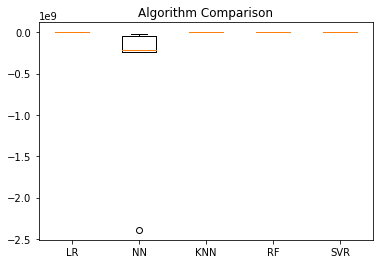

In [62]:
# //TODO: use cross-validation!!!

import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=5)
    
 cv_results = cross_val_score(model, train_X, train_y, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [55]:
# //TODO: use cross-validation!!!